<a href="https://colab.research.google.com/github/Maicopuc/Mac4euconfio/blob/main/PUCdadosMaicon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Main

In [115]:
# Seção 1: Importação de Bibliotecas,Carregamento de Dados e Verificação do código
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo para gráficos
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (10, 6), 'axes.titlesize': 16, 'axes.labelsize': 12})

# Carregar o conjunto de dados
file_path = '/content/drive/MyDrive/PUCRS/Fase2/tabela/steam_games.csv'
df = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataset (Teste)
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [116]:
# Verificar as colunas do DataFrame
df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [76]:
# Seção 2: Pré-processamento
# Remover colunas irrelevantes ou com muitos valores ausentes para simplificar a análise (exemplo)
df = df.dropna(subset=['Metacritic score', 'Release date', 'Positive', 'Negative', 'Price', 'Genres', 'Linux'])

# Transformação de dados, como converter datas para o formato datetime
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')
df = df.dropna(subset=['Release date'])  # Remove linhas onde a data de lançamento está ausente

# Criar uma nova coluna com ano para facilitar análises por ano
df['Year'] = df['Release date'].dt.year

<ipython-input-76-f2c08fc30548>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Release date'].dt.year


In [77]:
# Pergunta 1: Quais são os dez jogos mais bem avaliados, de acordo com o Metacritic?
# Ordenar os jogos por 'Pontuação Metacritic' e 'Data de Lançamento'
top10_jogos = df.sort_values(['Metacritic score', 'Release date'], ascending=[False, True]).head(10)

# Selecionar e exibir as colunas relevantes com nomes traduzidos
top10_jogos.rename(columns={'Name': 'Nome', 'Metacritic score': 'Pontuação Metacritic', 'Release date': 'Data de Lançamento'}, inplace=True)
top10_jogos[['Nome', 'Pontuação Metacritic', 'Data de Lançamento']]


,Nome,Pontuação Metacritic,Data de Lançamento
45752,Disco Elysium - The Final Cut,97,2019-10-15
64935,Persona 5 Royal,97,2022-10-20
49557,Half-Life,96,1998-11-08
36775,Half-Life 2,96,2004-11-16
32406,BioShock™,96,2007-08-21
57205,Grand Theft Auto V,96,2015-04-13
28170,Portal 2,95,2011-04-18
28484,Portal 2,95,2011-04-18
12746,Sid Meier's Civilization® IV,94,2006-10-25
55150,Sid Meier's Civilization® IV,94,2006-10-25


In [78]:
# Pergunta 2: Análise de Jogos do Gênero RPG
# Filtrar para jogos do gênero RPG
rpg_games = df[df['Genres'].str.contains('RPG', case=False, na=False)].copy()

# Garantir que 'DLC count', 'Positive', 'Negative', 'Screenshots' e 'Movies' sejam numéricos
rpg_games['DLC count'] = pd.to_numeric(rpg_games['DLC count'], errors='coerce').fillna(0)
rpg_games['Positive'] = pd.to_numeric(rpg_games['Positive'], errors='coerce').fillna(0)
rpg_games['Negative'] = pd.to_numeric(rpg_games['Negative'], errors='coerce').fillna(0)
rpg_games['Screenshots'] = pd.to_numeric(rpg_games['Screenshots'], errors='coerce').fillna(0)
rpg_games['Movies'] = pd.to_numeric(rpg_games['Movies'], errors='coerce').fillna(0)

# Calcular média e máximo para DLCs, avaliações positivas/negativas e material de demonstração
rpg_summary = {
    'Média de DLCs': round(rpg_games['DLC count'].mean(), 2),
    'Máximo de DLCs': round(rpg_games['DLC count'].max(), 2),
    'Média de Avaliações Positivas': round(rpg_games['Positive'].mean(), 2),
    'Máximo de Avaliações Positivas': round(rpg_games['Positive'].max(), 2),
    'Média de Avaliações Negativas': round(rpg_games['Negative'].mean(), 2),
    'Máximo de Avaliações Negativas': round(rpg_games['Negative'].max(), 2),
    'Média de Materiais de Demonstração': round((rpg_games['Screenshots'] + rpg_games['Movies']).mean(), 2),
    'Máximo de Materiais de Demonstração': round((rpg_games['Screenshots'] + rpg_games['Movies']).max(), 2)
}
rpg_summary


{'Média de DLCs': 0.95,
 'Máximo de DLCs': 2366,
 'Média de Avaliações Positivas': 1518.31,
 'Máximo de Avaliações Positivas': 964983,
 'Média de Avaliações Negativas': 247.21,
 'Máximo de Avaliações Negativas': 129925,
 'Média de Materiais de Demonstração': 0.0,
 'Máximo de Materiais de Demonstração': 0.0}

In [79]:
# Pergunta 3: Análise das Empresas que Mais Publicam Jogos Pagos
# Filtrar para jogos pagos
paid_games = df[df['Price'] > 0]

# Contar jogos por empresa e selecionar as cinco principais
top_publishers = paid_games['Publishers'].value_counts().head(5).index
top_paid_games = paid_games[paid_games['Publishers'].isin(top_publishers)]

# Calcular média e mediana de avaliações positivas para essas empresas
publisher_reviews = top_paid_games.groupby('Publishers')['Positive'].agg(['mean', 'median'])
publisher_reviews.rename(columns={'mean': 'Média de Avaliações Positivas', 'median': 'Mediana de Avaliações Positivas'}, inplace=True)
publisher_reviews


,Média de Avaliações Positivas,Mediana de Avaliações Positivas
Publishers,,
8floor,4.460251,3.0
Big Fish Games,7.363431,5.0
HH-Games,10.538462,9.0
Laush Studio,19.777070,12.0
Strategy First,276.450617,23.0


In [80]:
# Pergunta 4: Verificar o crescimento do número de jogos que suportam Linux entre 2018 e 2020
# Filtrar jogos lançados entre 2018 e 2020 que suportam Linux
linux_games = df[(df['Linux'] == True) & (df['Year'].isin([2018, 2020]))]
linux_counts = linux_games['Year'].value_counts().sort_index()

# Extrair os valores de 2018 e 2020
jogos_2018 = linux_counts.get(2018, 0)  # Retorna 0 se o ano não estiver presente
jogos_2020 = linux_counts.get(2020, 0)  # Retorna 0 se o ano não estiver presente

# Determinar o crescimento
resultado = "Houve um crescimento" if jogos_2020 > jogos_2018 else "Não houve um crescimento"

# Exibir os resultados
{
    "Jogos que suportam Linux em 2018": jogos_2018,
    "Jogos que suportam Linux em 2020": jogos_2020,
    "Resultado": resultado
}



{'Jogos que suportam Linux em 2018': 1186,
 'Jogos que suportam Linux em 2020': 1082,
 'Resultado': 'Não houve um crescimento'}

In [81]:
# Pergunta 5: Comparar a média de preços dos jogos lançados em 2010 e 2022
# Calcular a média de preços para os jogos de cada ano
avg_price_2010 = df[df['Year'] == 2010]['Price'].mean()
avg_price_2022 = df[df['Year'] == 2022]['Price'].mean()

# Formatar os valores como dólar ($) com duas casas decimais
media_2010 = f"${avg_price_2010:.2f}" if not pd.isna(avg_price_2010) else "Sem dados"
media_2022 = f"${avg_price_2022:.2f}" if not pd.isna(avg_price_2022) else "Sem dados"

# Exibir os resultados
{
    "Média de Preço em 2010": media_2010,
    "Média de Preço em 2022": media_2022
}


{'Média de Preço em 2010': '$8.53', 'Média de Preço em 2022': '$7.90'}

Gráfico 1: Percentual de Jogos com Suporte para Cada Sistema Operacional

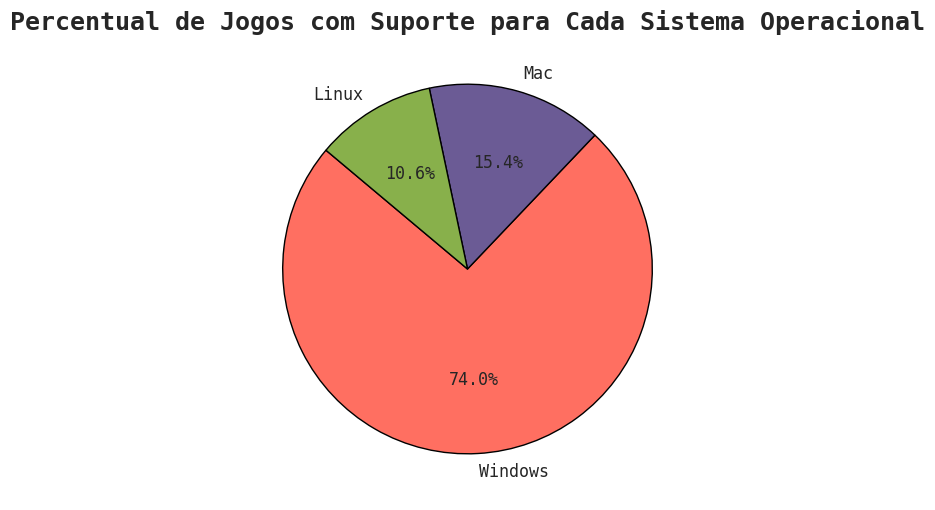

In [84]:
# Contar suporte para cada sistema operacional
os_counts = {
    'Windows': df['Windows'].sum(),
    'Mac': df['Mac'].sum(),
    'Linux': df['Linux'].sum()
}

# Gráfico de pizza com estilo voltado para jogos
colors = ['#ff6f61', '#6b5b95', '#88b04b']  # Cores vibrantes para cada sistema operacional
plt.pie(os_counts.values(), labels=os_counts.keys(), autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title("Percentual de Jogos com Suporte para Cada Sistema Operacional")
plt.show()


Gráfico 2: Número Total de Jogos Single-Player do Gênero Indie e Estratégia Lançados entre 2010 e 2020

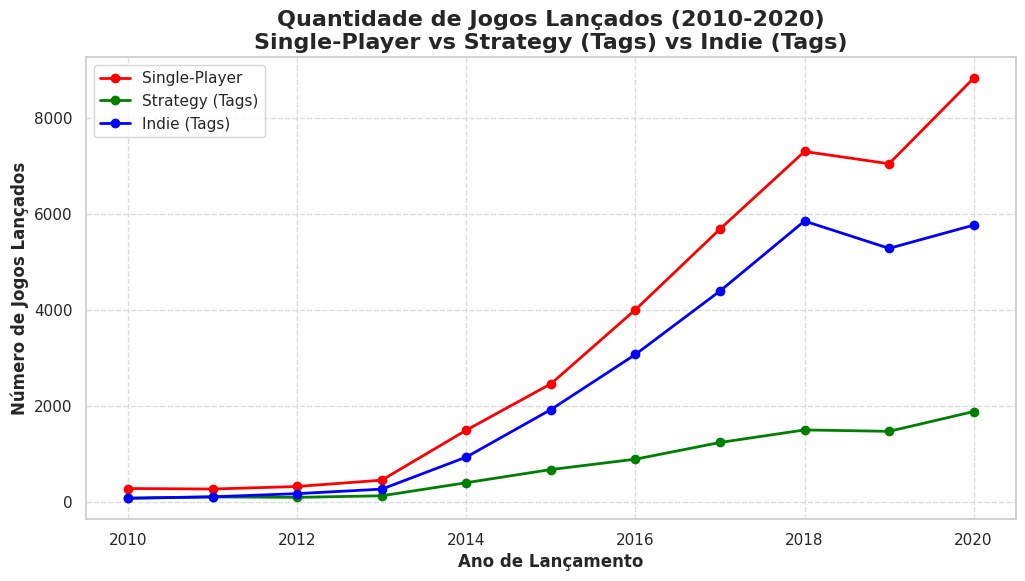

In [107]:
import matplotlib.pyplot as plt

# Filtrar jogos lançados entre 2010 e 2020
filtered_games = df[df['Year'].between(2010, 2020)]

# Contar o número de jogos lançados a cada ano para a categoria Single-Player
single_player_count = filtered_games[filtered_games['Categories'].str.contains('Single-player', case=False, na=False)].groupby('Year').size()

# Contar o número de jogos lançados a cada ano para a tag Strategy na coluna Tags
strategy_count = filtered_games[filtered_games['Tags'].str.contains('Strategy', case=False, na=False)].groupby('Year').size()

# Contar o número de jogos lançados a cada ano para a tag Indie na coluna Tags
indie_count = filtered_games[filtered_games['Tags'].str.contains('Indie', case=False, na=False)].groupby('Year').size()

# Preencher anos ausentes com zero para garantir que as linhas sejam contínuas
years = range(2010, 2021)
single_player_count = single_player_count.reindex(years, fill_value=0)
strategy_count = strategy_count.reindex(years, fill_value=0)
indie_count = indie_count.reindex(years, fill_value=0)

# Plotar o gráfico
plt.figure(figsize=(12, 6))

# Linha para jogos de categoria Single-Player
plt.plot(single_player_count.index, single_player_count.values, label='Single-Player', color='red', marker='o', linewidth=2)

# Linha para jogos com tag Strategy na coluna Tags
plt.plot(strategy_count.index, strategy_count.values, label='Strategy (Tags)', color='green', marker='o', linewidth=2)

# Linha para jogos com tag Indie na coluna Tags
plt.plot(indie_count.index, indie_count.values, label='Indie (Tags)', color='blue', marker='o', linewidth=2)

# Configurações do gráfico
plt.xlabel("Ano de Lançamento")
plt.ylabel("Número de Jogos Lançados")
plt.title("Quantidade de Jogos Lançados (2010-2020)\nSingle-Player vs Strategy (Tags) vs Indie (Tags)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



Gráfico 3: Número Total de Jogos Multi-Players do Gênero Indie e Estratégia Lançados entre 2015 e 2020

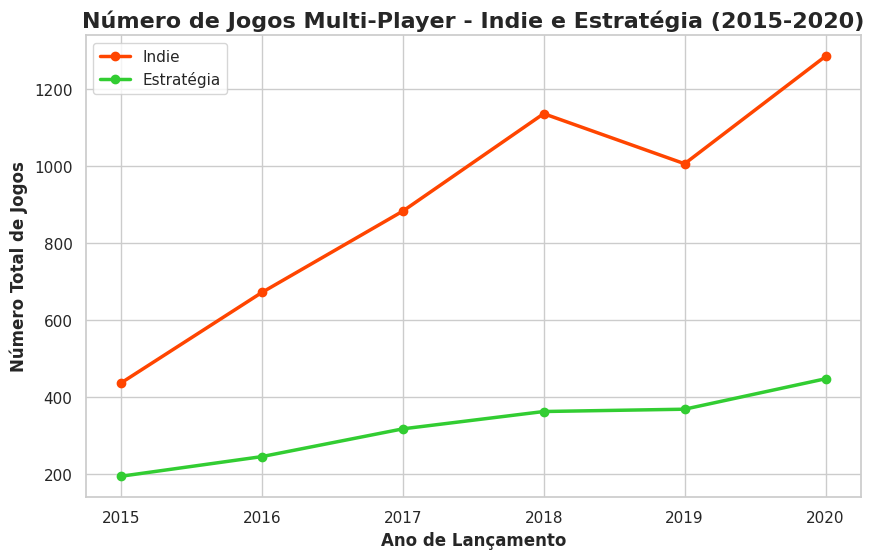

In [109]:
import matplotlib.pyplot as plt

# Filtrar jogos multi-players entre 2015 e 2020 para Indie e Estratégia
multi_indie_strategy = df[(df['Year'].between(2015, 2020)) &
                          (df['Categories'].str.contains('Multi-Player', case=False, na=False)) &
                          (df['Genres'].str.contains('Indie|Strategy', case=False, na=False))]

# Contar jogos por gênero e ano
indie_count_multi = multi_indie_strategy[multi_indie_strategy['Genres'].str.contains('Indie', case=False, na=False)].groupby('Year').size()
strategy_count_multi = multi_indie_strategy[multi_indie_strategy['Genres'].str.contains('Strategy', case=False, na=False)].groupby('Year').size()

# Plotar tendência de jogos Indie e Estratégia no mesmo gráfico
plt.figure(figsize=(10, 6))
plt.plot(indie_count_multi.index, indie_count_multi.values, label='Indie', color='#ff4500', marker='o', linewidth=2.5)
plt.plot(strategy_count_multi.index, strategy_count_multi.values, label='Estratégia', color='#32cd32', marker='o', linewidth=2.5)

plt.xlabel("Ano de Lançamento")
plt.ylabel("Número Total de Jogos")
plt.title("Número de Jogos Multi-Player - Indie e Estratégia (2015-2020)")
plt.legend()
plt.show()

